In [39]:
from utils.utils import preprocess_phone_data
df = preprocess_phone_data(f'2022-03-03_17_25_58_my_iOS_device.csv')

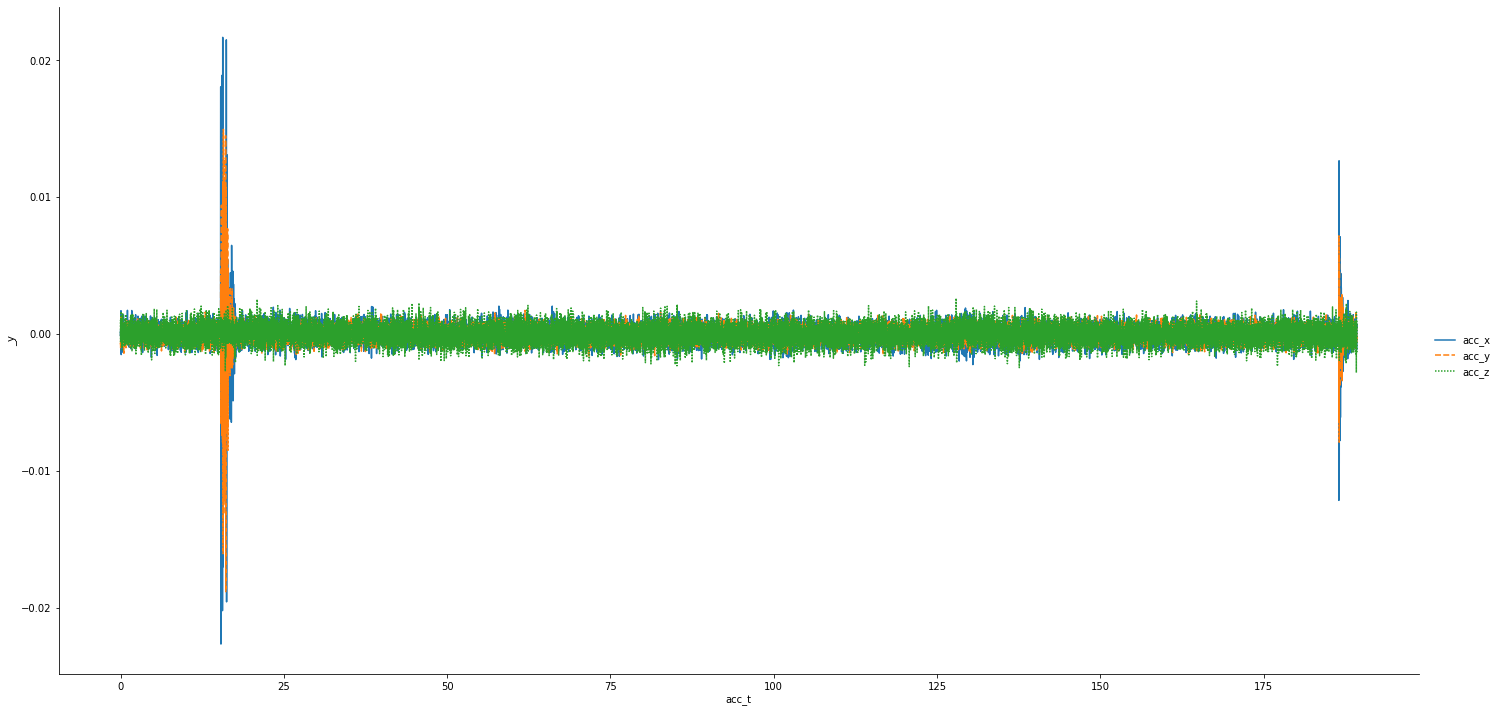

In [40]:
import numpy as np
import seaborn as sns
acc = df[['acc_t','acc_x','acc_y','acc_z']]
acc = acc.set_index('acc_t')
acc['acc_x'] = acc['acc_x']-np.mean(acc['acc_x'])
acc['acc_y'] = acc['acc_y']-np.mean(acc['acc_y'])
acc['acc_z'] = acc['acc_z']-np.mean(acc['acc_z'])
sns.relplot(data=acc,kind='line',height=10,aspect=2)

In [45]:
acc = np.array(acc)
time = df['acc_t']
velocities = [np.zeros(3)]
positions = [np.zeros(3)]
delta_ts = []
for i,_ in enumerate(time):
    if(i==0):
        continue
    # print(i,time[i])
    delta_t = time[i]-time[i-1]
    delta_ts.append(delta_t)
    velocity = acc[i]*delta_t + velocities[i-1]
    velocities.append(velocity)
    position = velocities[i]*delta_t + positions[i-1]
    positions.append(position)

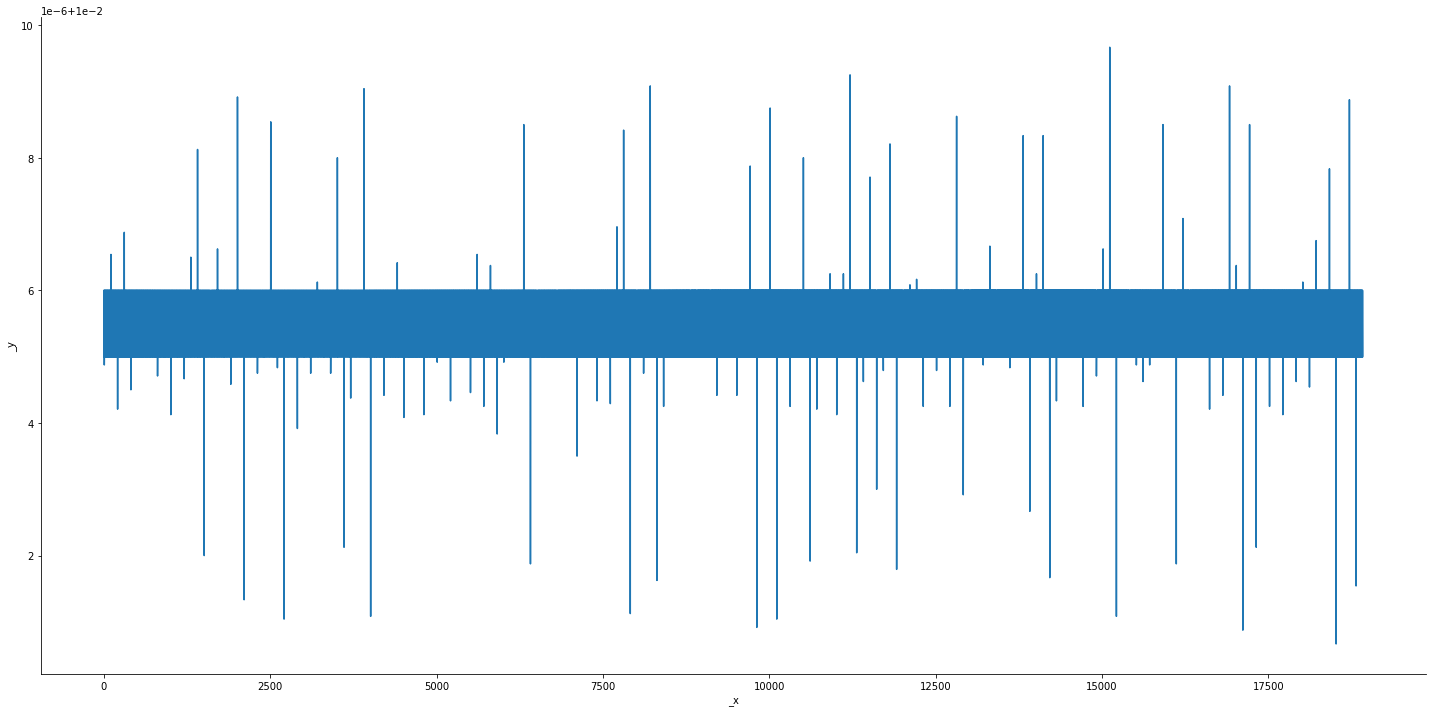

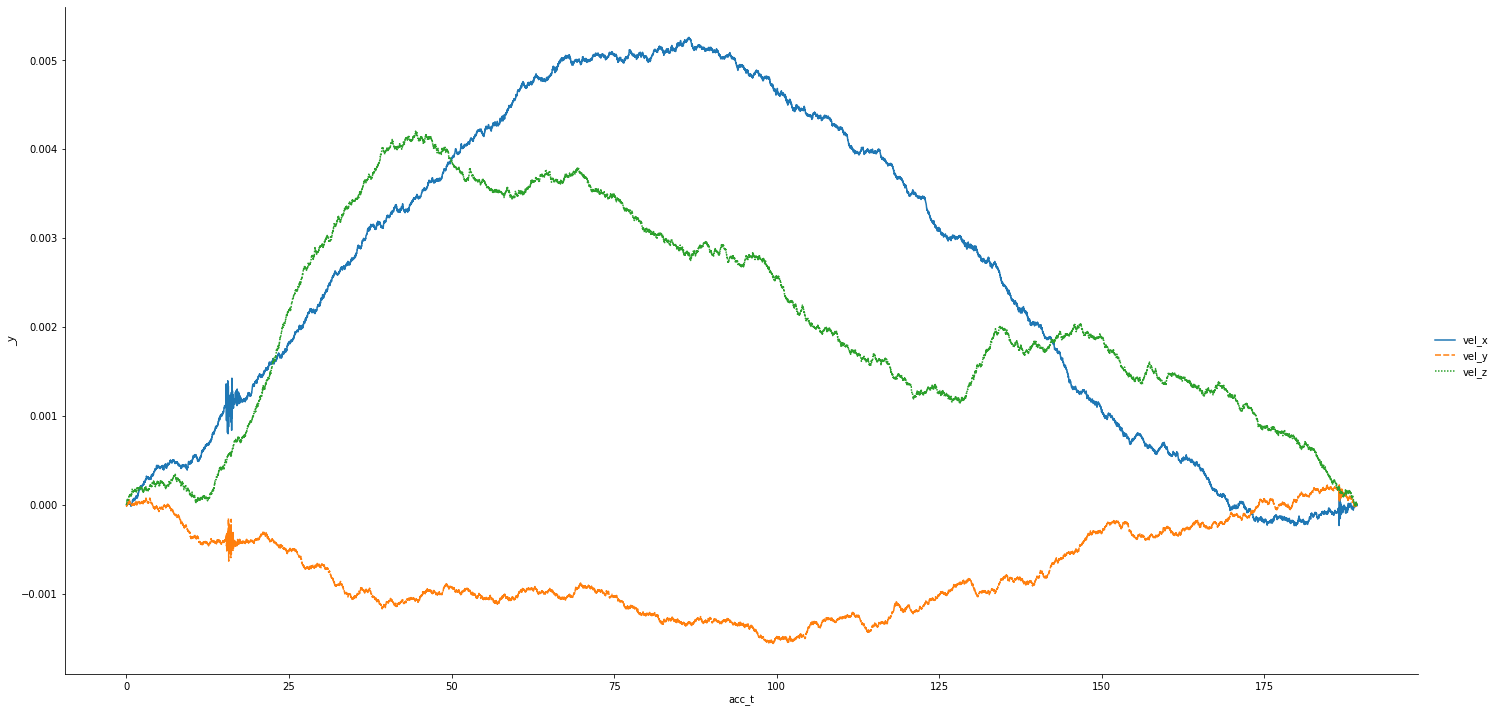

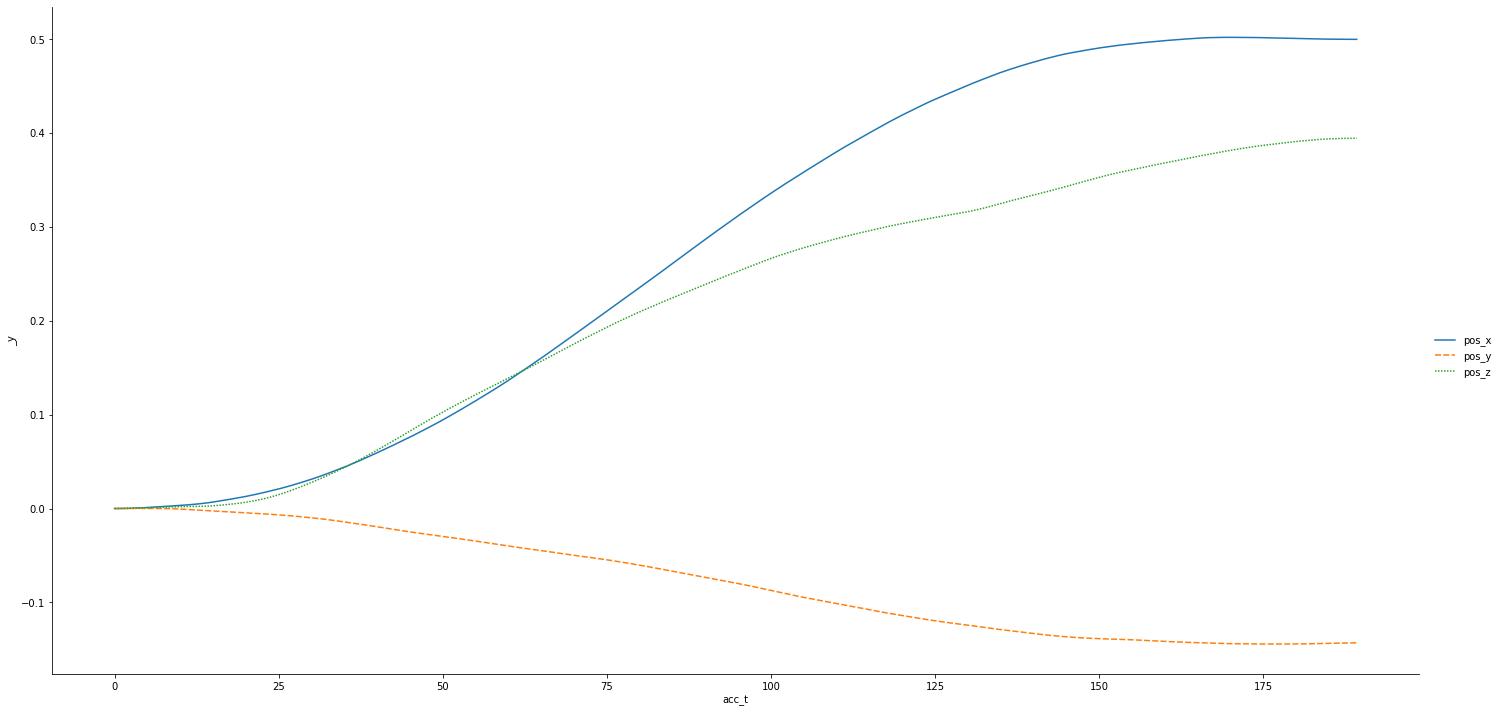

In [46]:
import pandas as pd
vel = pd.DataFrame(velocities,index=df['acc_t'],columns=['vel_x','vel_y','vel_z'])
pos = pd.DataFrame(positions,index=df['acc_t'],columns=['pos_x','pos_y','pos_z'])
sns.relplot(data=delta_ts,kind='line',height=10,aspect=2)
sns.relplot(data=vel,kind='line',height=10,aspect=2)
sns.relplot(data=pos,kind='line',height=10,aspect=2)